In [2]:
import pandas as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### read data

In [3]:
df = ps.read_csv("Dummy Data HSS.csv")
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


### to get a concise summary of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [5]:
#To convert the word to integer

In [6]:
df.replace('Nano',1, inplace = True)
df.replace('Micro',2, inplace = True)
df.replace('Macro',3, inplace = True)
df.replace('Mega',4, inplace = True)

In [7]:
#set the head column to lower case and replace the space to "_",make it easy to code

In [8]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [9]:
df.head()

,tv,radio,social_media,influencer,sales
0,16.0,6.566231,2.907983,4,54.732757
1,13.0,9.237765,2.409567,4,46.677897
2,41.0,15.886446,2.913410,4,150.177829
3,83.0,30.020028,6.922304,4,298.246340
4,15.0,8.437408,1.405998,2,56.594181


### Data Cleaning

In [10]:
#Dropping rows with missing values.
print(df.isnull().sum())
df = df.dropna()

tv              10
radio            4
social_media     6
influencer       0
sales            6
dtype: int64


### Data Exploratory Analysis

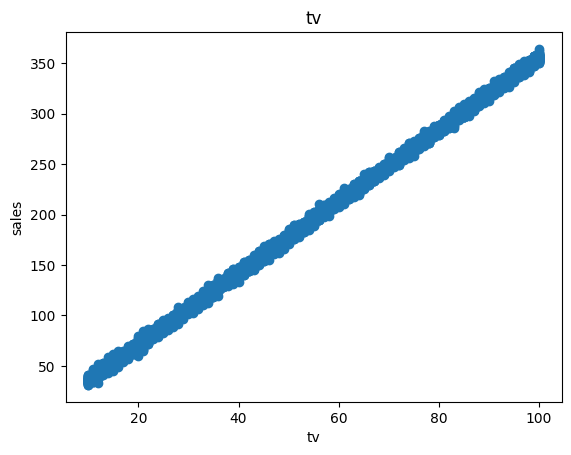

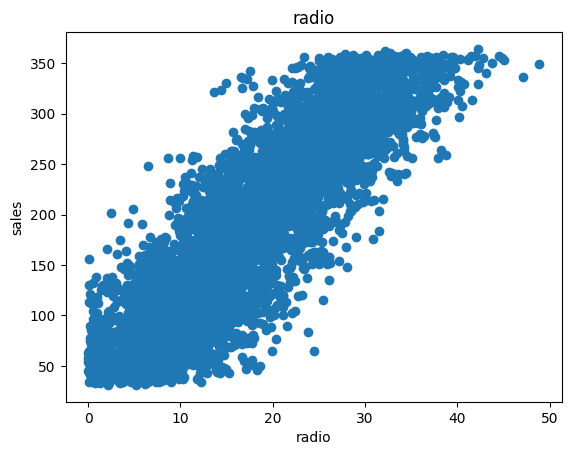

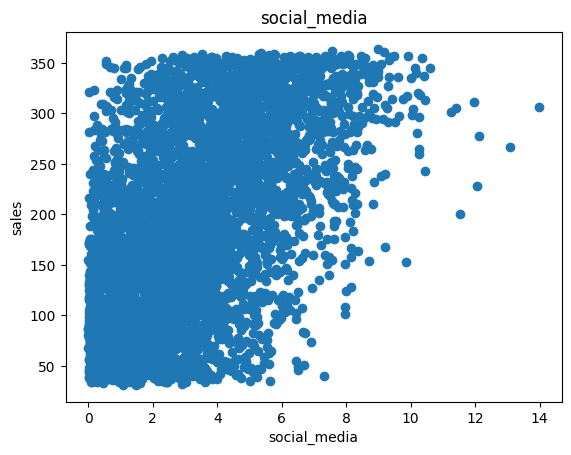

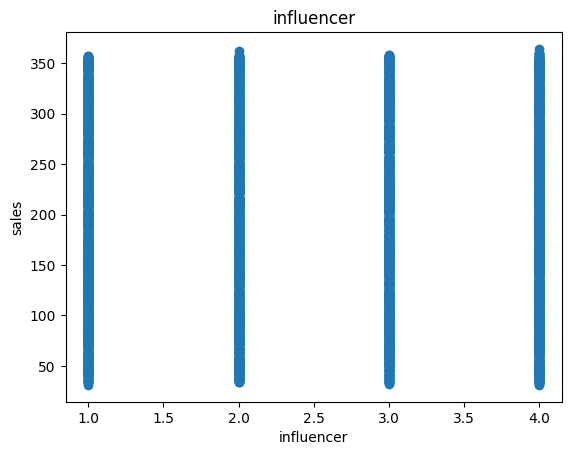

In [11]:
for label in df.columns[0:-1]:
    plt.scatter(df[label],df["sales"])
    plt.title(label)
    plt.ylabel("sales")
    plt.xlabel(label)
    plt.show()

### Correalation Matrix

<AxesSubplot: >

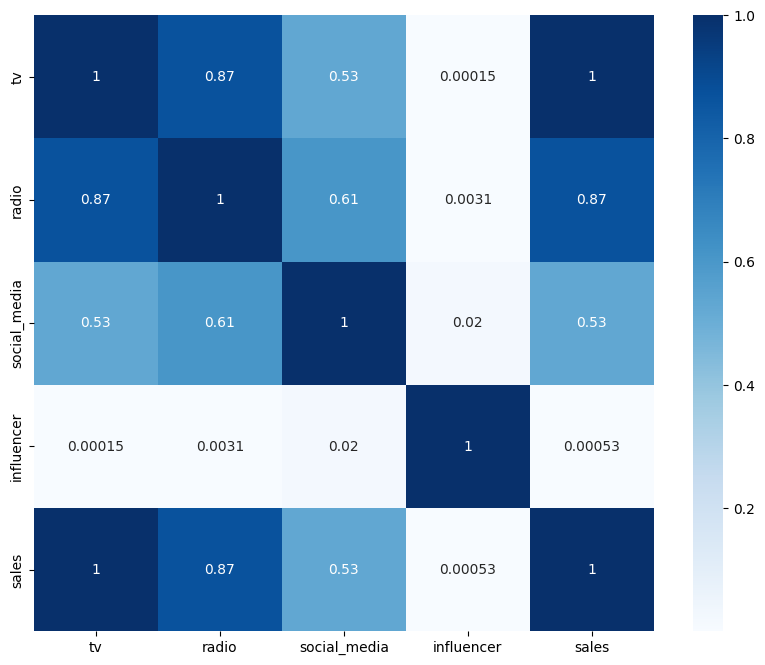

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True, cmap='Blues')

### Feature engineering


In [13]:
#To drop the irrelevant column
df.drop(['influencer'], axis = 1, inplace = True)

In [14]:
df

,tv,radio,social_media,sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866
4568,71.0,20.610685,6.545573,249.101915
4569,44.0,19.800072,5.096192,163.631457
4570,71.0,17.534640,1.940873,253.610411


### Detecting Outlier Visually

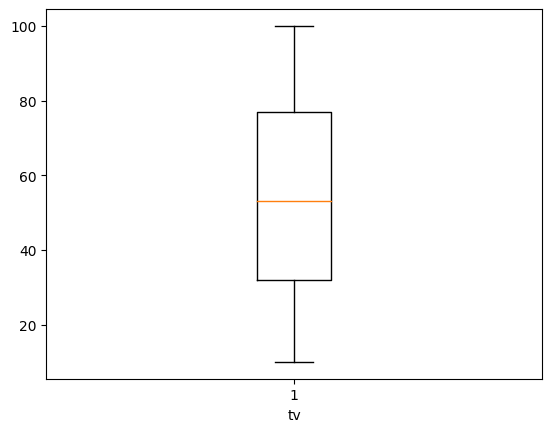

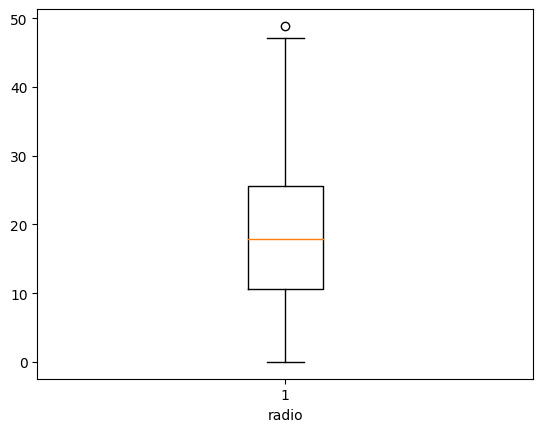

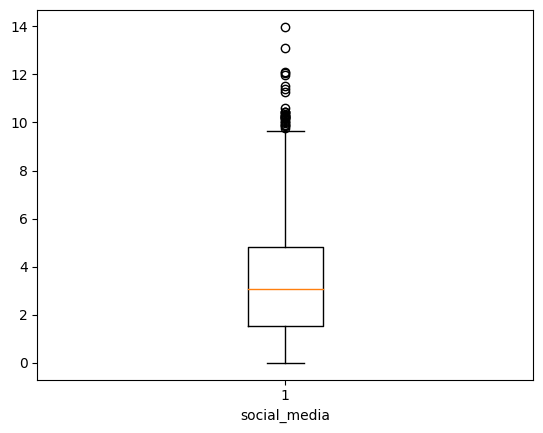

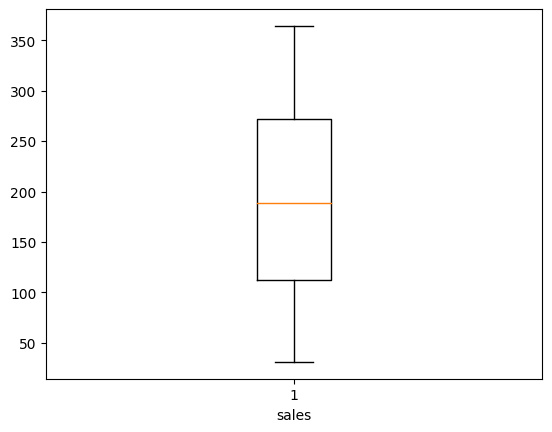

In [15]:
for c in df.columns:
        plt.boxplot(df[c])
        plt.xlabel(c)
        plt.show()

In [16]:
# finding lower quantile Q1 and upper quantile Q3 and Inner Quantile Range IQR
Q1s= df['social_media'].quantile(0.25)
Q3s= df['social_media'].quantile(0.75)
IQRs= Q3s-Q1s
print("lower quantile :",Q1s)
print("upper quantile :",Q3s)
print("Inner Quantile Range :",IQRs)
# finding the lower whisker and upper whisker
Lower_Whiskers = Q1s-1.5*IQRs
Upper_Whiskers = Q3s+1.5*IQRs
print(Lower_Whiskers,Upper_Whiskers)
#So we create a thresold for below the lower whisker and beyond the upper whisker

lower quantile : 1.5308215755
upper quantile : 4.80491913
Inner Quantile Range 3.2740975545
-3.3803247562500003 9.71606546175


In [17]:
#Apply conditions to remove outliers
df = df[df['social_media']< Upper_Whiskers]
df = df[df['social_media']> Lower_Whiskers]
df['social_media']

0       2.907983
1       2.409567
2       2.913410
3       6.922304
4       1.405998
          ...   
4567    0.717090
4568    6.545573
4569    5.096192
4570    1.940873
4571    5.046548
Name: social_media, Length: 4518, dtype: float64

<AxesSubplot: xlabel='social_media'>

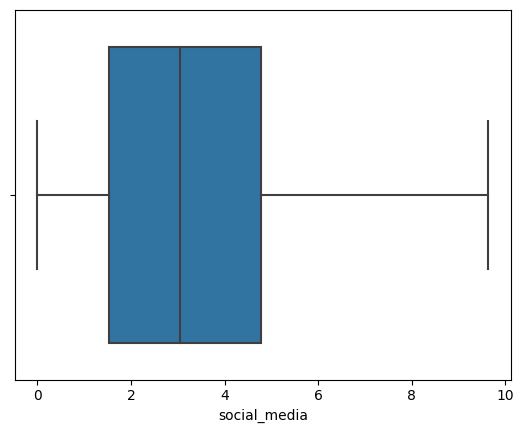

In [18]:
# check boxplot
sns.boxplot(x=df['social_media'])

In [19]:
import statsmodels.formula.api as smf

model1 = smf.ols('sales~tv+radio+social_media', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.488e+06
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:49:28   Log-Likelihood:                -11300.
No. Observations:                4518   AIC:                         2.261e+04
Df Residuals:                    4514   BIC:                         2.263e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1274      0.103     -1.231   

In [20]:
model1_pred= model1.predict(df)
model1_pred

0        56.846016
1        46.146555
2       145.878264
3       295.452638
4        53.277424
           ...    
4567     92.487593
4568    252.739098
4569    156.546560
4570    252.759758
4571    149.437409
Length: 4518, dtype: float64

Text(0.5, 1.0, 'Observed vs Fitted')

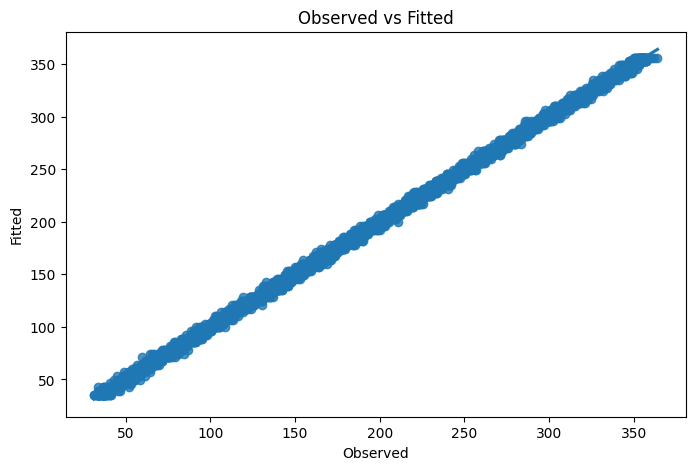

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.regplot(x=df['sales'], y=model1_pred)
plt.xlabel("Observed")
plt.ylabel("Fitted")
plt.title('Observed vs Fitted')

In [22]:
# Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
dataset_train,dataset_test  = train_test_split(df.iloc[:,:],test_size = 0.2)
dataset_train.columns

Index(['tv', 'radio', 'social_media', 'sales'], dtype='object')

In [23]:

t_tv= dataset_train['tv']
t_radio=dataset_train['radio']
t_socialmedia= dataset_train['social_media']
t_sales= dataset_train['sales']

In [24]:
s#Train set performance
from sklearn.metrics import mean_absolute_error
model_train = smf.ols('t_sales~t_tv+t_radio+t_socialmedia',data=dataset_train).fit()
train_pred = model_train.predict(dataset_train)
train_resid = train_pred - dataset_train['sales']
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
print("RMSE train: ",train_rmse)
print("MAE train: ",mean_absolute_error(dataset_train['sales'],train_pred))

RMSE train:  2.961100941447648
MAE train:  2.373196807327511


In [25]:
Tv_Budget = 60
Radio_Budget = 18.02
Social_media_Budget = 1.92
Prediction = ps.DataFrame({"tv":[Tv_Budget], "radio":[Radio_Budget], "social_media":[Social_media_Budget]}) 
Prediction["Expected Sales"] = model1.predict(Prediction)
Prediction

,tv,radio,social_media,Expected Sales
0,60,18.02,1.92,213.565768
